# Employee Survey Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

In [142]:
df = pd.read_csv('/content/employee_survey.csv')
# data = pd.read_csv('/kaggle/input/employee-survey/employee_survey.csv')

# Exploratory Data analysis  for employee survey of workplace

Hello!

In this notebool I will analyze a dataset called "Employee survey", taken from Kaggle.  
I Will  start with looking on general inforamtion and statistics, like the describe function, and looking for correlations. I will also clean the data id needed.   
After that, I will search for underlying connections in the data by breaking the data to groups.  
Eventually I want to find interesting insights from the data about the workplace, the employees and the connection between them.

# Look on general info and statistics about the data.


In [4]:
df.dtypes

,0
EmpID,int64
Gender,object
Age,int64
MaritalStatus,object
JobLevel,object
Experience,int64
Dept,object
EmpType,object
WLB,int64
WorkEnv,int64


In [5]:
#  Change all the Object type columns to Category, so we could analyze and display it.

for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [6]:
# General statistics
df.describe()

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [7]:
# Look for Na values

df.isna().sum()

,0
EmpID,0
Gender,0
Age,0
MaritalStatus,0
JobLevel,0
Experience,0
Dept,0
EmpType,0
WLB,0
WorkEnv,0


In [8]:
# Look for duplicates
df.duplicated().sum()

0

Looks like this data set is already quite cleaned. No NaN, no duplicates.

## Look for outliers

In [9]:
from scipy import stats

In [10]:
# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Print the number of outliers found and drop them from the table
print(f"Number of outliers found: {len(df_outliers)}")
df = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

Number of outliers found: 78


## Look for correlations

Text(0.5, 1.0, 'Survey correlations')

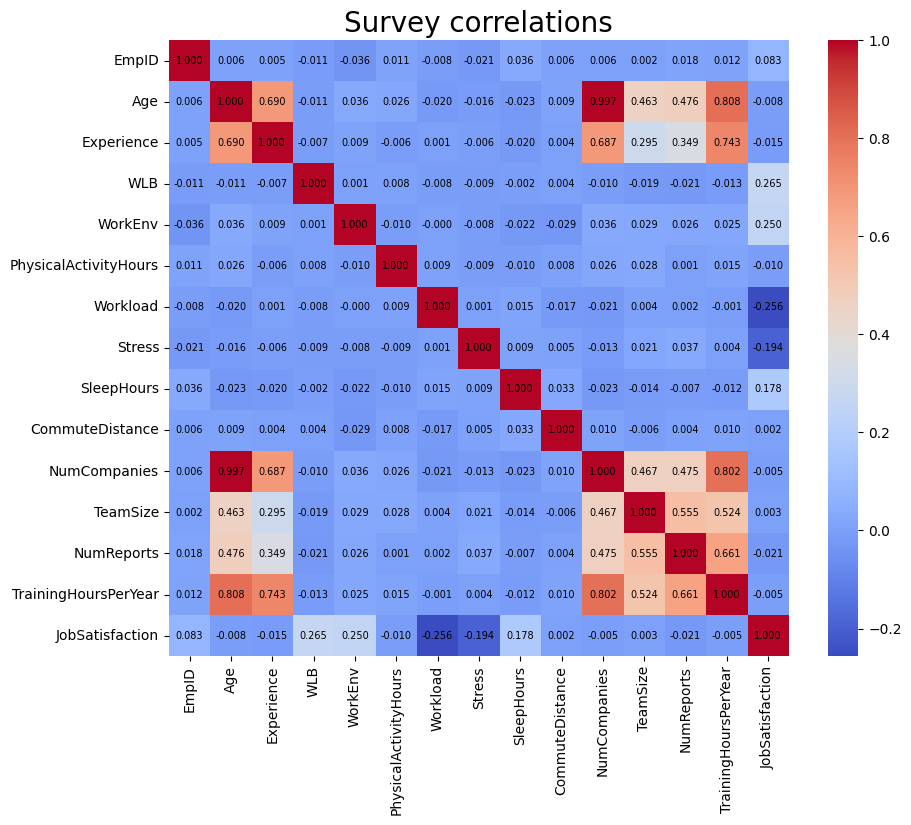

In [11]:
# Take only the numeric data for the correlation analysis.
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the result, using Pandas corr function
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".3f",
            annot_kws={"size": 7, "color": "black"})
plt.title("Survey correlations", size=20)


We see here some trivial correlations, a.e. between age and experience, or between age and number of companies they worked in.
In addition, a positive correlation observed between Job satisfaction and several factors such as work life balance and work environment. A negative correlation observed between Job satisfaction and Workload or between Job satisfaction and stress.
Counterintuitively, no correlation was found between Stress and Workload. May be a further examination will be needed.

# Look for Categorical factors


We can see the correlations betwee the categorical variables by using Cramér's V, and visualosing the results with heat map.

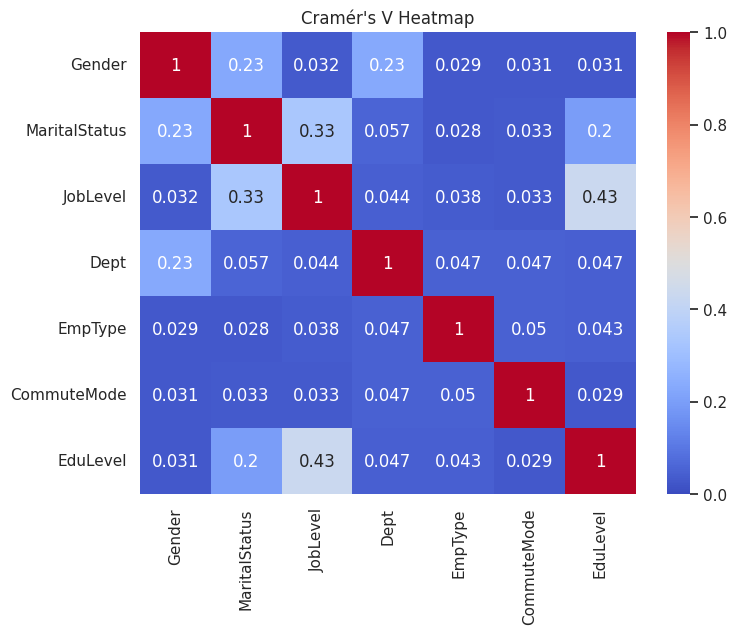

In [115]:
from scipy.stats import chi2_contingency

# Take only the categorical data from the data set
df_categorical = df.select_dtypes(include=['category']).copy()

# Function to calculate Cramér's V between two categorical columns
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r-1, k-1))

# Create an empty DataFrame to store Cramér's V values
columns = df_categorical.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

# Calculate Cramér's V for each pair of columns
for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


We can see here some interesting connections, such as gender and Marital status, or gender and department


In [12]:
# Ignore 'FutureWarning' so they won't annoy us.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Gender

Here I will look for the diversity in gender, and the effect of gender on other variables.


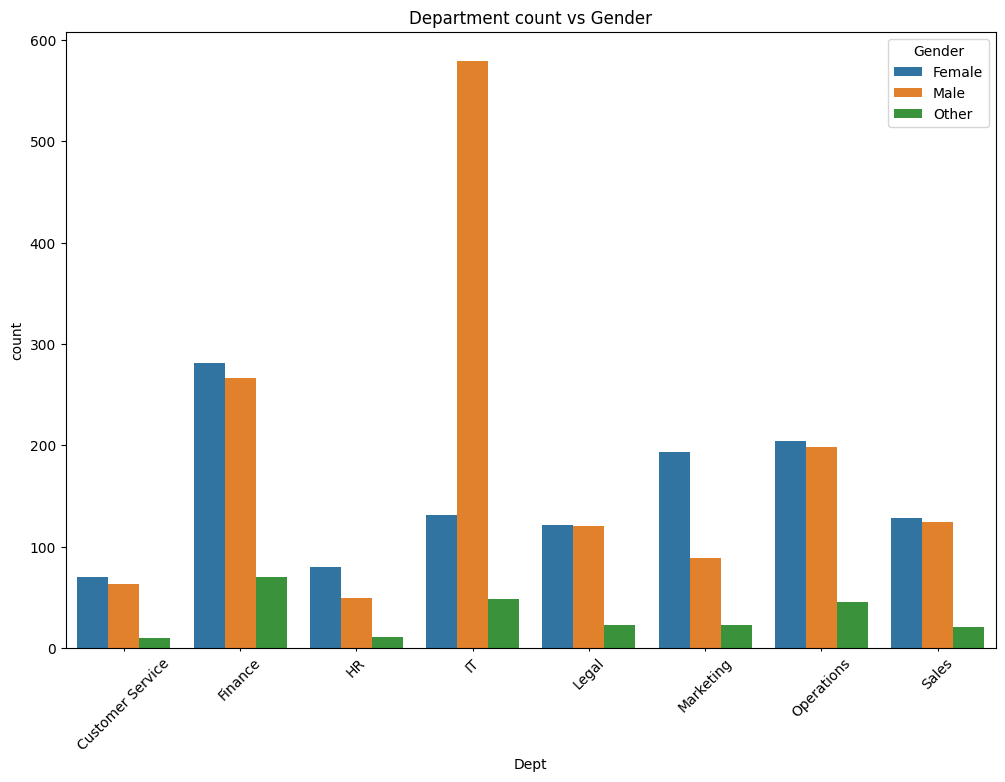

In [13]:
## Create a plot of number of employees in each department, by gender.

fig = plt.figure(figsize=(12, 8))
sns.countplot(x='Dept',hue = 'Gender', data=df)
plt.title('Department count vs Gender')
plt.tick_params(axis='x', rotation=45,size = 2)

We can see that the IT department is the largest department. We can also see very clearly that this department also has mostly man working there. So if we want to check how the gender affects different variables, we will need to exclude the IT department sometimes.

Text(0.5, 1.0, 'Including the IT department')

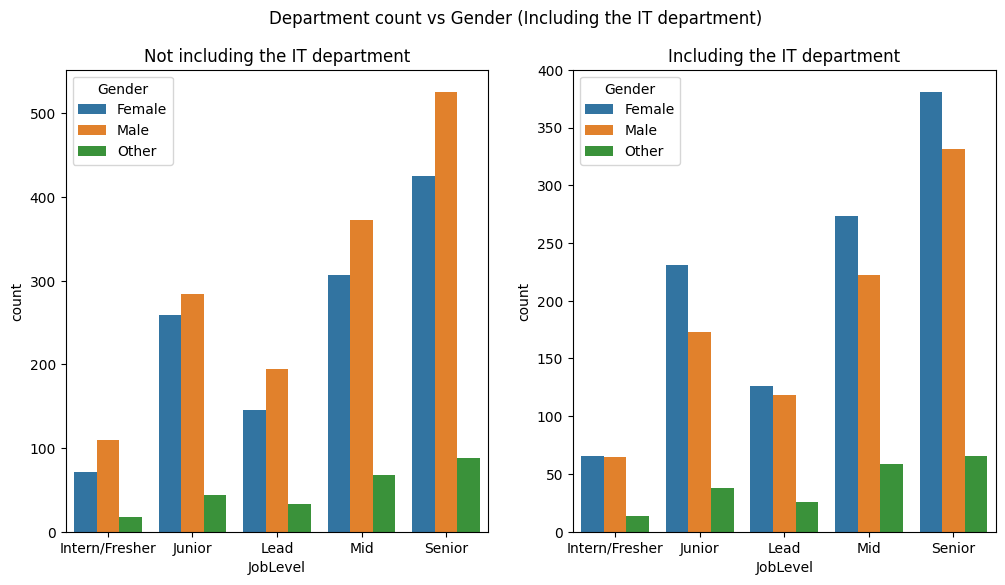

In [14]:
# General props of the figure
fig, axes = plt.subplots(1, 2, figsize = (12,6))
plt.suptitle('Department count vs Gender (Including the IT department)')


# Create a count plot of employee by job levels, including the IT department
sns.countplot(x='JobLevel',hue = 'Gender', data = df, ax = axes[0])
axes[0].set_title('Not including the IT department', size = 12)

# Create a count plot of employee by job levels, not including the IT department
sns.countplot(x='JobLevel',hue = 'Gender', data=df[df['Dept'] != 'IT'], ax = axes[1])
plt.title('Including the IT department', size = 12)

Now we can see that when including all the employees from the IT department, it looks like more men are more senior there. However, when not including the IT department, the opposite revealed.

<Axes: xlabel='Age', ylabel='Count'>

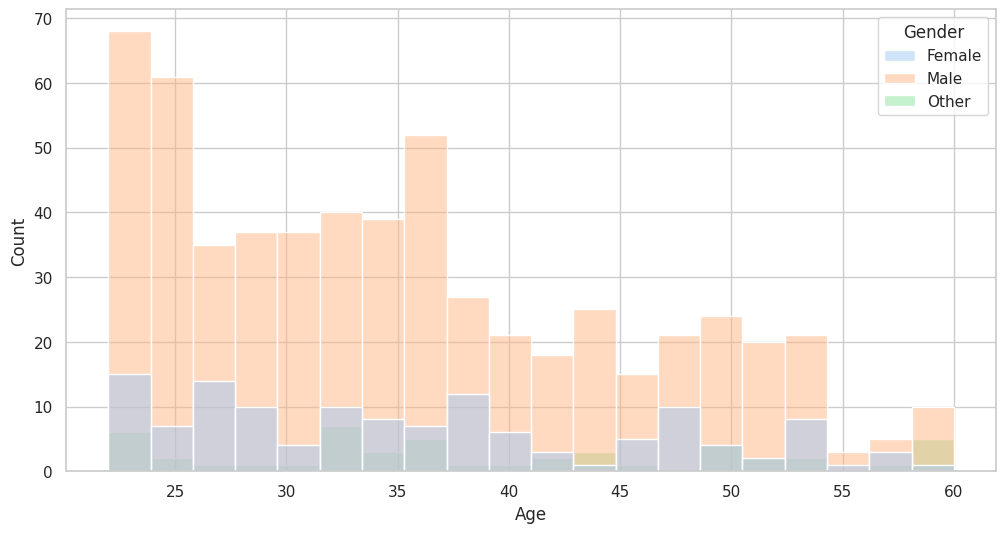

In [104]:
# Age department gender (For investigating trends in the IT)
fig = plt.figure(figsize=(12, 6))
sns.histplot(x = 'Age', hue = 'Gender', data = df[df['Dept'] == 'IT'], bins = 20)

We can see that the men remain a large majority in the IT department, also in younger ages, where one might expect some more females joining this field due to current trends in the world.

## Depratment

<Axes: xlabel='Dept', ylabel='Experience'>

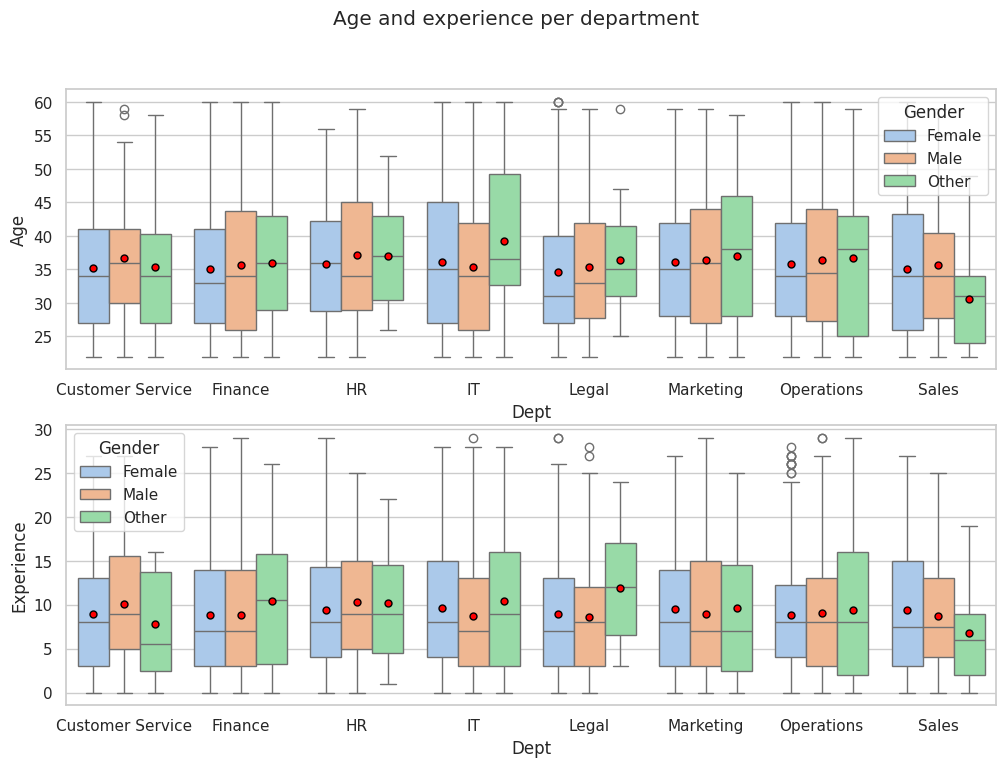

In [140]:
# General props of the figure. 2 long plots. One below the other.
fig, axes = plt.subplots(2, 1, figsize = (12,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")
plt.suptitle('Age and experience per department')

# Plot of age by department and gender
sns.boxplot(x = 'Dept', y = 'Age', hue = 'Gender', data = df, ax = axes[0],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":5})

# Plot of experience by department and gender
sns.boxplot(x = 'Dept', y = 'Experience', hue = 'Gender', data = df, ax = axes[1],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":5})

## Educational level

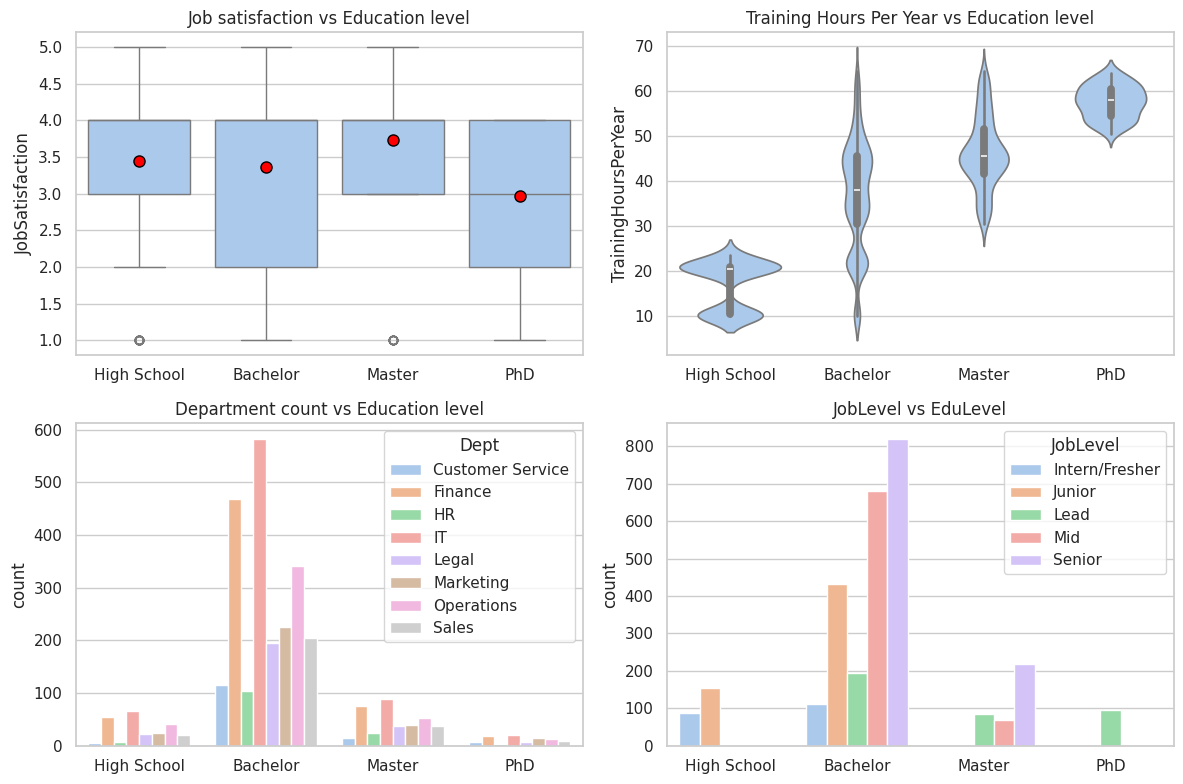

In [124]:
# Rearanging the categories in the columns, so it won't be alphabetical, but chronological.
df['EduLevel'] = pd.Categorical(df['EduLevel'], categories=['High School', 'Bachelor', 'Master', 'PhD'], ordered=True)


### General properties of the figure

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")

# Job satisfaction vs Education level
sns.boxplot(x='EduLevel', y='JobSatisfaction', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":8},
            data=df, ax=axes[0, 0])
axes[0, 0].set_title('Job satisfaction vs Education level')
axes[0, 0].set_xlabel('')


# TrainingHoursPerYear vs Education level
sns.violinplot(x='EduLevel', y='TrainingHoursPerYear', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Training Hours Per Year vs Education level')
axes[0, 1].set_xlabel('')

# Department count vs Education level
sns.countplot(x='EduLevel', hue='Dept', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Department count vs Education level')
axes[1, 0].set_xlabel('')

# Job level count vs Education level
sns.countplot(x='EduLevel', hue='JobLevel', data=df)
axes[1, 1].set_title('JobLevel vs EduLevel')
axes[1, 1].set_xlabel('')

plt.tight_layout()

Here we can see some things. First of all, we see that the PhD employees are slighly less satisfied than the rest.

Moreover, We see that people who have higher education, tend to work in spesific roles in their departments and tend to get more training hours.

## Employee type

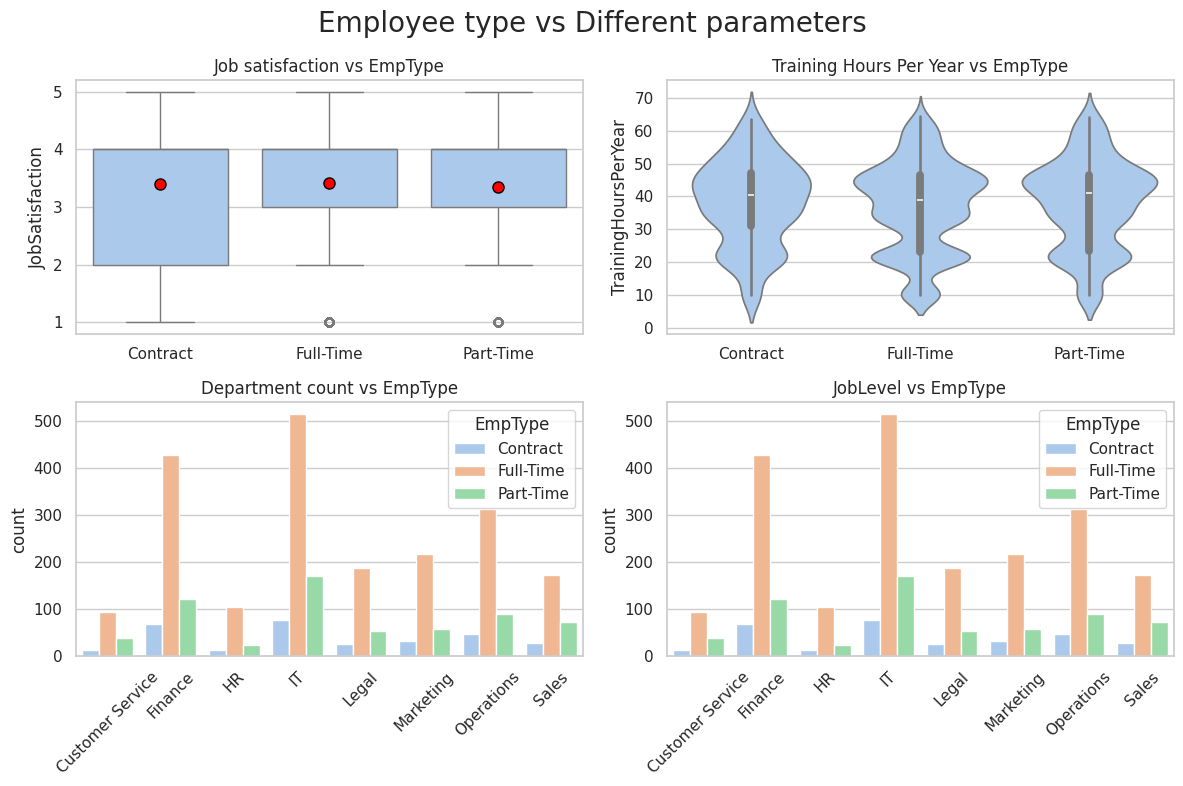

In [25]:
# General properties of the figure

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")
plt.suptitle('Employee type vs Different parameters', size = 20)

# Job satisfaction vs Education level
sns.boxplot(x='EmpType', y='JobSatisfaction', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":8},
            data=df, ax=axes[0, 0])
axes[0, 0].set_title('Job satisfaction vs EmpType')
axes[0, 0].set_xlabel('')


# TrainingHoursPerYear vs Education level
sns.violinplot(x='EmpType', y='TrainingHoursPerYear', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Training Hours Per Year vs EmpType')
axes[0, 1].set_xlabel('')

# Department count vs Education level
sns.countplot(x='Dept', hue='EmpType', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Department count vs EmpType')
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)


# Job level count vs Education level
sns.countplot(x='Dept', hue='EmpType', data=df)
axes[1, 1].set_title('JobLevel vs EmpType')
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

We can see here that employee who work on contract, are more diverse about their job satisfaction.

## Work environment vs different parameters

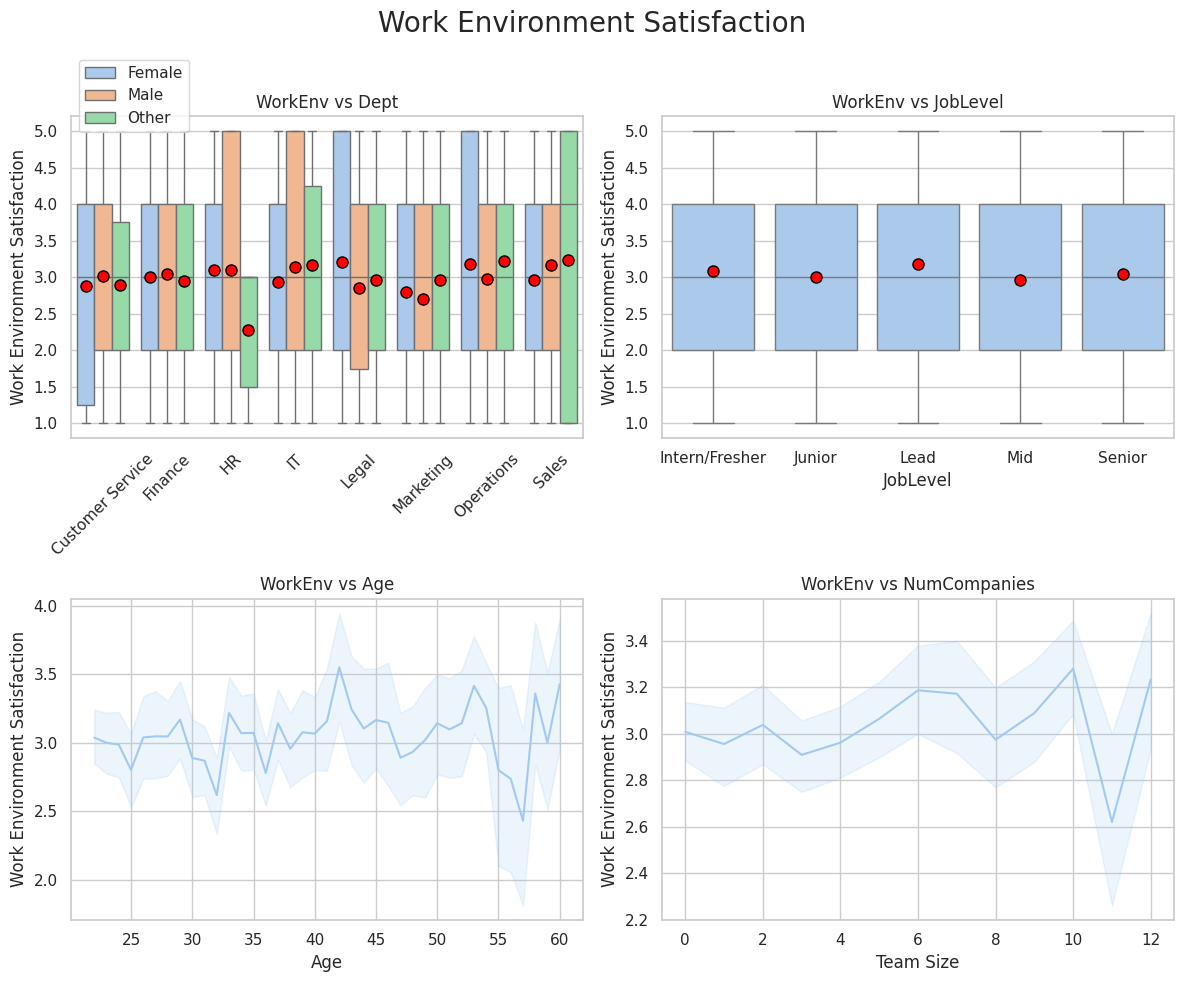

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")
plt.suptitle('Work Environment Satisfaction', size = 20, weight = 15)

# WorkEnv vs Dept
sns.boxplot(x='Dept', y='WorkEnv', hue = 'Gender',data=df, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":8}, ax=axes[0, 0])
axes[0, 0].set_title('WorkEnv vs Dept')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Work Environment Satisfaction')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(bbox_to_anchor=(0, 1.2), loc='upper left')

# WorkEnv vs Gender
sns.boxplot(x='JobLevel', y='WorkEnv', data=df, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":8}, ax=axes[0, 1])
axes[0, 1].set_title('WorkEnv vs JobLevel')
axes[0, 1].set_xlabel('JobLevel')
axes[0, 1].set_ylabel('Work Environment Satisfaction')

# WorkEnv vs Age
sns.lineplot(x='Age', y='WorkEnv', data=df, ax=axes[1, 0])
axes[1, 0].set_title('WorkEnv vs Age')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Work Environment Satisfaction')

# WorkEnv vs TeamSize
sns.lineplot(x='NumCompanies', y='WorkEnv', data=df, ax=axes[1, 1])
axes[1, 1].set_title('WorkEnv vs NumCompanies')
axes[1, 1].set_xlabel('Team Size')
axes[1, 1].set_ylabel('Work Environment Satisfaction')

plt.tight_layout()
plt.show()


Here we can see there is no much effect of different factors on the environemnt people report. Two points are one drop for Gender "Other" in the HR department, and one drop for people around 56.

### Following analysis



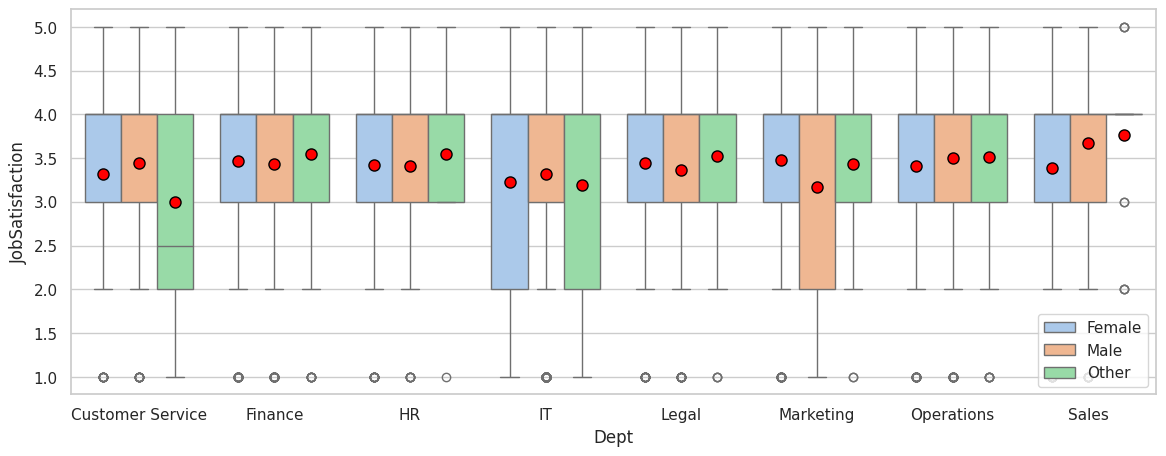

In [120]:
fig = plt.figure(figsize=(14, 5))

df_Oth_HR = df[(df['Dept'] == 'HR') & (df['Gender'] == 'Other')]
sns.boxplot(x='Dept', y='JobSatisfaction', hue = 'Gender',data=df, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":8})
plt.legend(loc = 'lower right')

In [49]:
df_Oth_HR

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
170,139,Other,32,Single,Mid,10,HR,Part-Time,2,1,...,7.3,Motorbike,19,3,12,0,Bachelor,False,35.0,5
377,666,Other,38,Single,Mid,1,HR,Full-Time,1,3,...,6.9,Car,12,5,11,0,Bachelor,False,30.5,4
696,2487,Other,26,Single,Mid,4,HR,Full-Time,4,2,...,6.6,Public Transport,23,1,11,0,Bachelor,False,32.0,4
773,2707,Other,44,Single,Senior,22,HR,Contract,3,2,...,7.3,Motorbike,4,7,24,9,Bachelor,False,51.0,4
774,2713,Other,30,Single,Mid,8,HR,Full-Time,3,3,...,8.5,Public Transport,17,2,10,0,Bachelor,False,34.0,4
943,1019,Other,42,Single,Mid,20,HR,Full-Time,1,3,...,6.8,Public Transport,29,6,15,0,Bachelor,False,40.0,3
2281,2473,Other,37,Single,Senior,15,HR,Full-Time,5,1,...,7.3,Public Transport,12,5,15,9,Bachelor,False,47.5,4
2298,2525,Other,48,Single,Senior,4,HR,Part-Time,1,3,...,8.7,Public Transport,19,8,20,7,Bachelor,False,42.0,4
2482,1056,Other,52,Single,Senior,14,HR,Full-Time,2,3,...,8.2,Walk,1,10,24,3,Master,False,47.0,3
2490,2233,Other,31,Single,Senior,9,HR,Full-Time,2,1,...,6.3,Car,16,3,24,6,Master,True,44.5,3


I don't found anything interesting so far about the "Other" gender in the HR department. However, there only 11 observations of this slice of employee.

# Job satisfaction

### Job satisfaction vs more obvious parameters

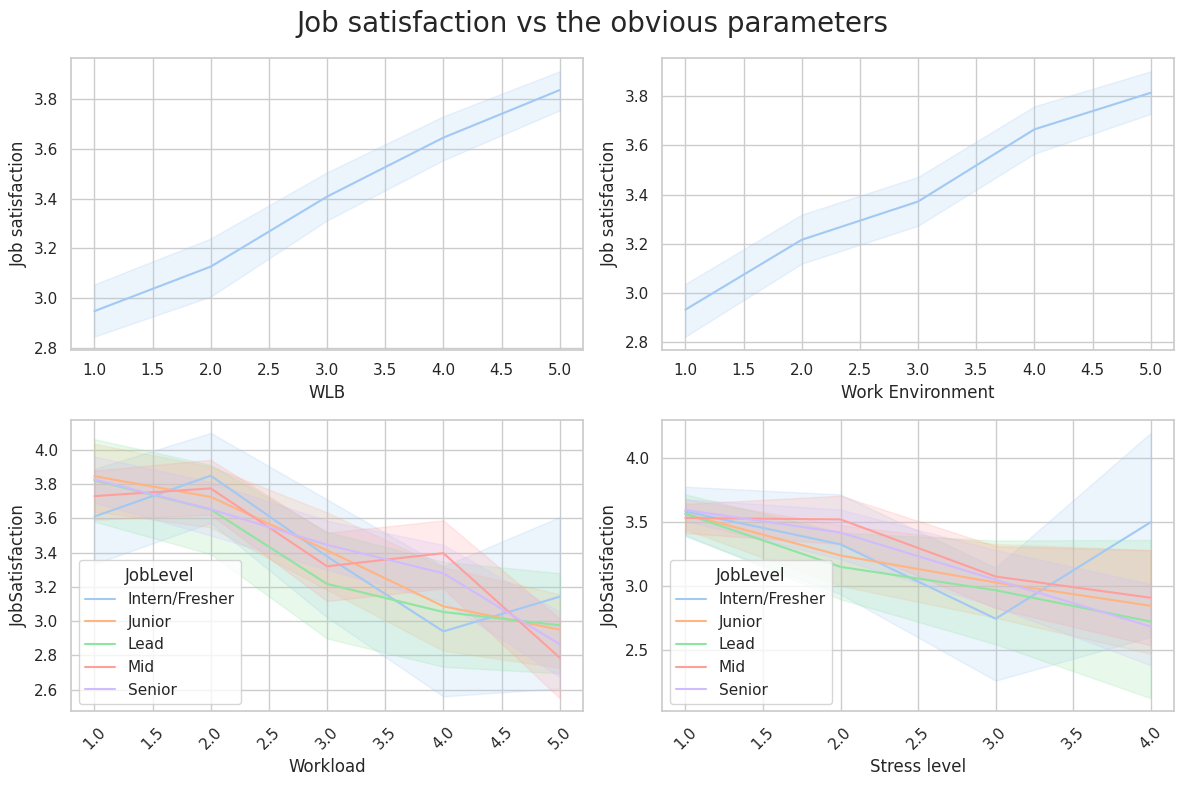

In [138]:
## General properties of the figure

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")
plt.suptitle('Job satisfaction vs the obvious parameters', size = 20)

# Job satisfaction vs Education level
sns.lineplot(x='WLB', y='JobSatisfaction', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('WLB')
axes[0, 0].set_ylabel('Job satisfaction')


# TrainingHoursPerYear vs Education level
sns.lineplot(x='WorkEnv', y='JobSatisfaction', data=df, ax=axes[0, 1])
axes[0, 1].set_ylabel('Job satisfaction')
axes[0, 1].set_xlabel('Work Environment')

# Department count vs Education level
sns.lineplot(x='Workload', y = 'JobSatisfaction', hue='JobLevel', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Workload')
axes[1, 0].tick_params(axis='x', rotation=45)


# Job level count vs Education level
sns.lineplot(x='Stress', y = 'JobSatisfaction', hue='JobLevel', data=df)
axes[1, 1].set_xlabel('Stress level')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

In the upper plots we see a positive correlation between WLB and work environment to job satisfaction.  
At the lower plots, we observe a negative correlation between Stress and workload to job satisfaction.  
These results are no surprising.

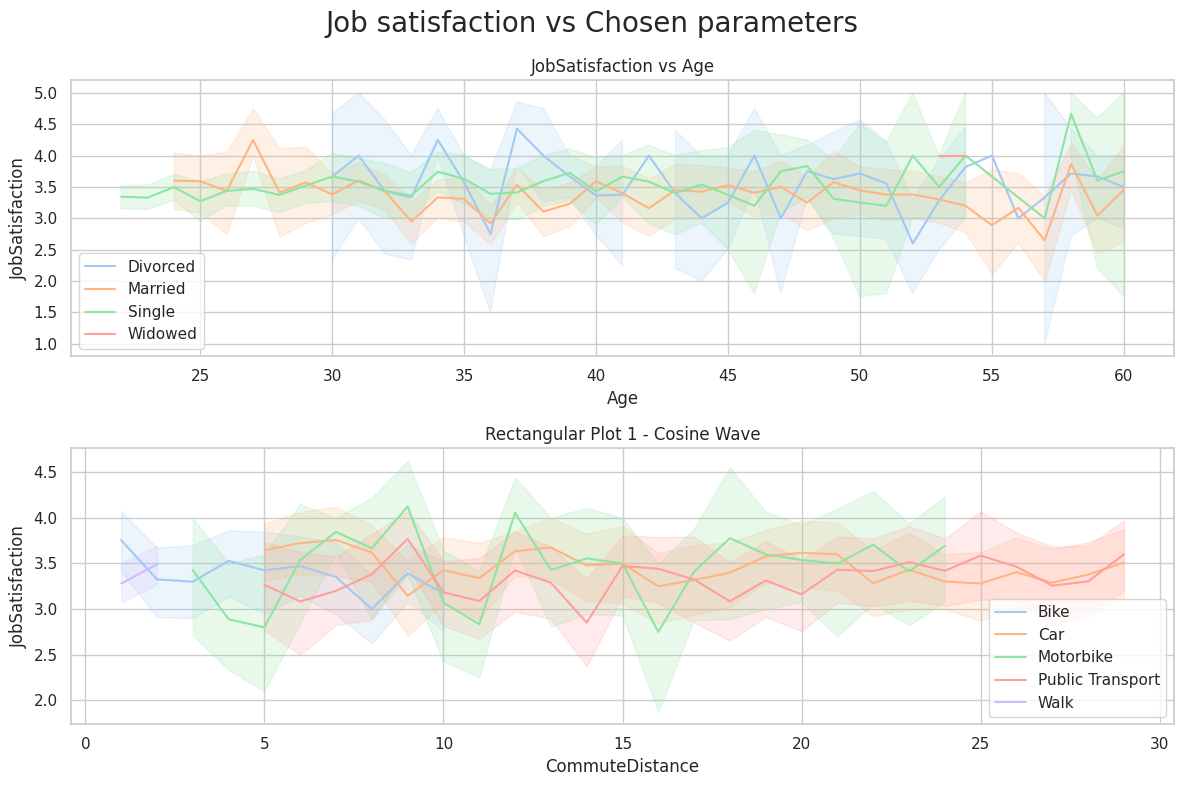

In [74]:
# Create a figure and gridspec layout
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)
plt.suptitle('Job satisfaction vs Chosen parameters', size = 20)


# First plot - Spanning both columns
ax1 = fig.add_subplot(gs[0, :])  # First row, spanning both columns
sns.lineplot(data=df, x='Age', y='JobSatisfaction',hue = 'MaritalStatus', ax=ax1)
ax1.set_title('JobSatisfaction vs Age')
ax1.legend()

# Second row, left plot
ax2 = fig.add_subplot(gs[1, :])
sns.lineplot(x='CommuteDistance', y = 'JobSatisfaction', hue = 'CommuteMode', data = df, ax=ax2)
ax2.set_title('Rectangular Plot 1 - Cosine Wave')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


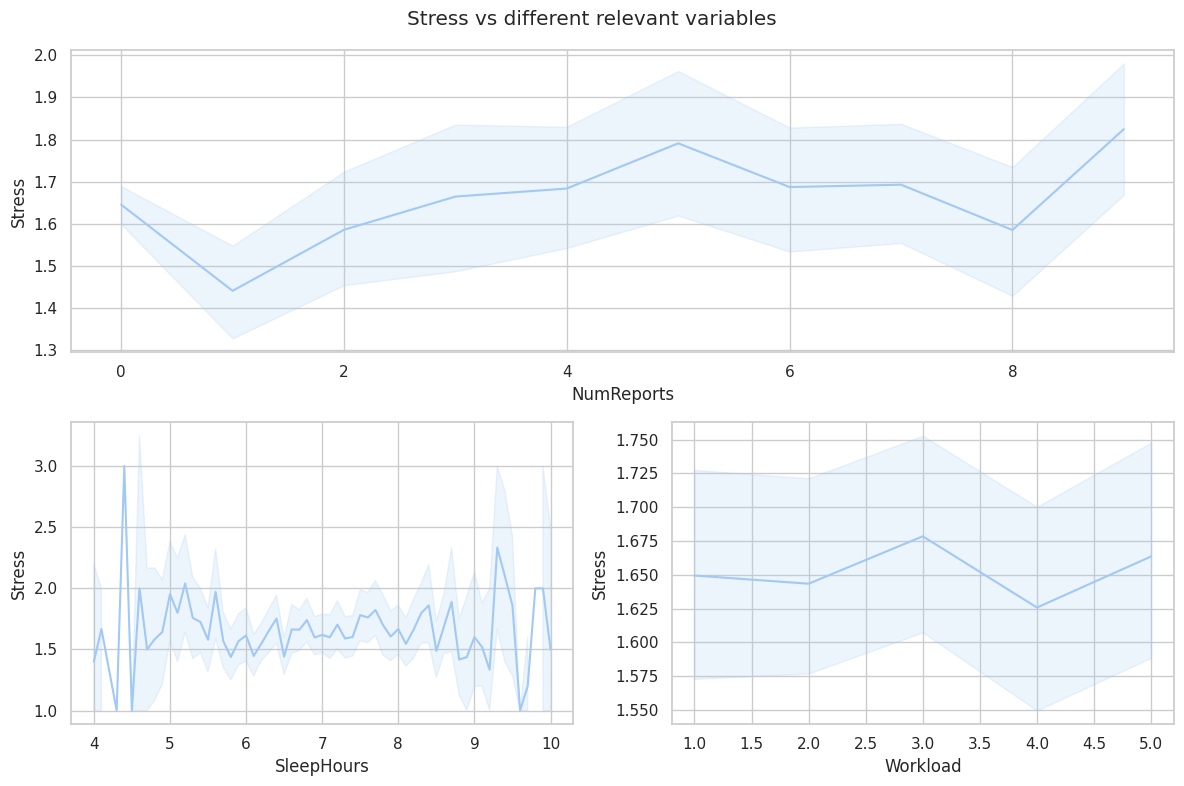

In [139]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)
plt.suptitle('Stress vs different relevant variables')

# Create a plot of Number of reports vs stress
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(x='NumReports', y='Stress', data=df, ax = ax1)

# Create a plot of Sleep hours vs stress
ax2 = fig.add_subplot(gs[1, 0])
sns.lineplot(x='SleepHours', y='Stress', data=df, ax = ax2)

# Create a plot of workload vs stress
ax3 = fig.add_subplot(gs[1, 1])
sns.lineplot(x='Workload', y='Stress', data=df, ax = ax3)

# Adjust layout
plt.tight_layout()

We can observe in the upper plot a very small effect of Number of reports on the stress.  
In the bottom, we see no effect of sleep hours or workload on stress.